**Import the necessary modules and prepare the data**

In [1]:
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
rawBostonData = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')

In [3]:
rawBostonData = rawBostonData.dropna()
rawBostonData = rawBostonData.drop_duplicates()
renamedBostonData = rawBostonData.rename(
    columns={
        "CRIM": "crimeRatePerCapita",
        " ZN ": "landOver25K_sqft",
        "INDUS ": "non-retailLandProptn",
        "CHAS": "riverDummy",
        "NOX": "nitrixOxide_pp10m",
        "RM": "AvgNo.RoomsPerDwelling",
        "AGE": "ProptnOwnerOccupied",
        "DIS": "weightedDist",
        "RAD": "radialHighwaysAccess",
        "TAX": "propTaxRate_per10K",
        "PTRATIO": "pupilTeacherRatio",
        "LSTAT": "pctLowerStatus",
        "MEDV": "medianValue_Ks",
    }
)
X = renamedBostonData.drop("crimeRatePerCapita", axis=1)
y = renamedBostonData[["crimeRatePerCapita"]]
seed = 10
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_data_size, random_state=seed
)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


**Exercise 2.05: Fit a multiple linear regression model using the Statsmodels formula API** 

In [4]:
multiLinearModel = smf.ols(
    formula="crimeRatePerCapita \
        ~ pctLowerStatus \
        + radialHighwaysAccess \
        + medianValue_Ks \
        + nitrixOxide_pp10m",
    data=train_data,
)
multiLinearModResult = multiLinearModel.fit()
print(multiLinearModResult.summary())


                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     57.77
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           2.19e-37
Time:                        22:16:47   Log-Likelihood:                -1154.9
No. Observations:                 354   AIC:                             2320.
Df Residuals:                     349   BIC:                             2339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8912 

In [7]:
import numpy as np
x = np.linspace(0, 1, 100)
y = 2*x + np.random.rand(100)

df = pd.DataFrame({'x': x, 'y': y})

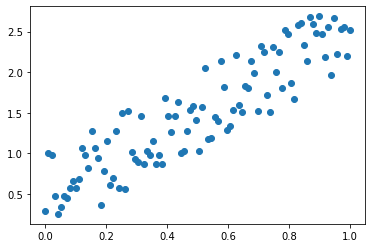

In [8]:
import matplotlib.pyplot as plt 

plt.scatter(x="x", y="y", data=df)

In [12]:
model = smf.ols(formula='y ~ x', data=df)
model_results = model.fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     427.9
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.56e-37
Time:                        22:18:06   Log-Likelihood:                -19.003
No. Observations:                 100   AIC:                             42.01
Df Residuals:                      98   BIC:                             47.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4469      0.059      7.616      0.0

In [14]:
x2 = x**2
x3 = x*x2

In [17]:
model = smf.ols(formula='y ~ x + x2', data=df)
model_results = model.fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.90e-36
Time:                        22:19:29   Log-Likelihood:                -18.221
No. Observations:                 100   AIC:                             42.44
Df Residuals:                      97   BIC:                             50.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5259      0.087      6.067      0.0